<a href="https://colab.research.google.com/github/NightmareXIX/Fruit-and-Vegetable-Detection-using-CNN/blob/main/testingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading Model

In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

##Visualization and Performing prediction on single image

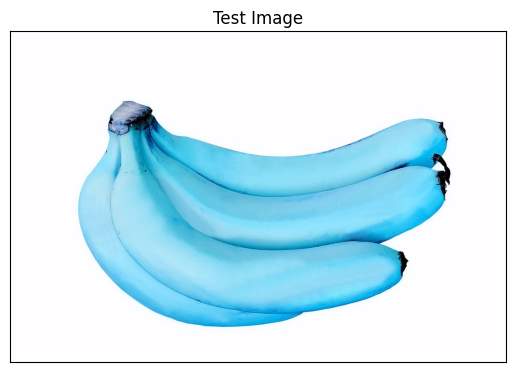

In [ ]:
import cv2
image_path = "/content/drive/MyDrive/FruitVegDataset/test/banana/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# Converting single image to batch
input_arr = np.array([input_arr])

prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 394ms/step


In [ ]:
print(prediction)
print(max(prediction[0]))

[[5.5198085e-10 9.9979872e-01 8.7874987e-06 1.4476547e-07 5.1985360e-08
  2.0516576e-11 6.8952027e-06 1.4339781e-06 1.6970723e-08 9.3106098e-07
  6.8133957e-08 1.4718843e-09 3.0784978e-08 6.9006467e-07 4.7155240e-08
  1.3231013e-08 6.1171534e-08 3.8053916e-08 1.4949106e-07 1.7753027e-09
  6.2105898e-09 1.2823210e-07 6.7727719e-13 6.4780017e-09 6.8627974e-09
  1.3588108e-04 9.8392972e-10 3.2052888e-10 9.9829926e-08 3.4655077e-05
  1.1071950e-05 1.6582711e-09 7.7634409e-12 4.0039048e-09 7.9771915e-08
  5.4079116e-08]]
0.9997987


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitVegDataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 360 files belonging to 36 classes.


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

1


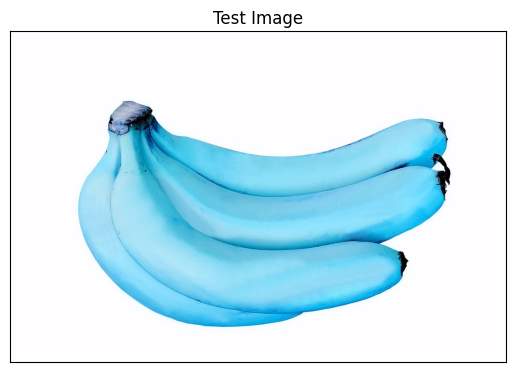

In [ ]:
# Display image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Single Prediction
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a banana


1/1 [==============================] - 0s 41ms/step


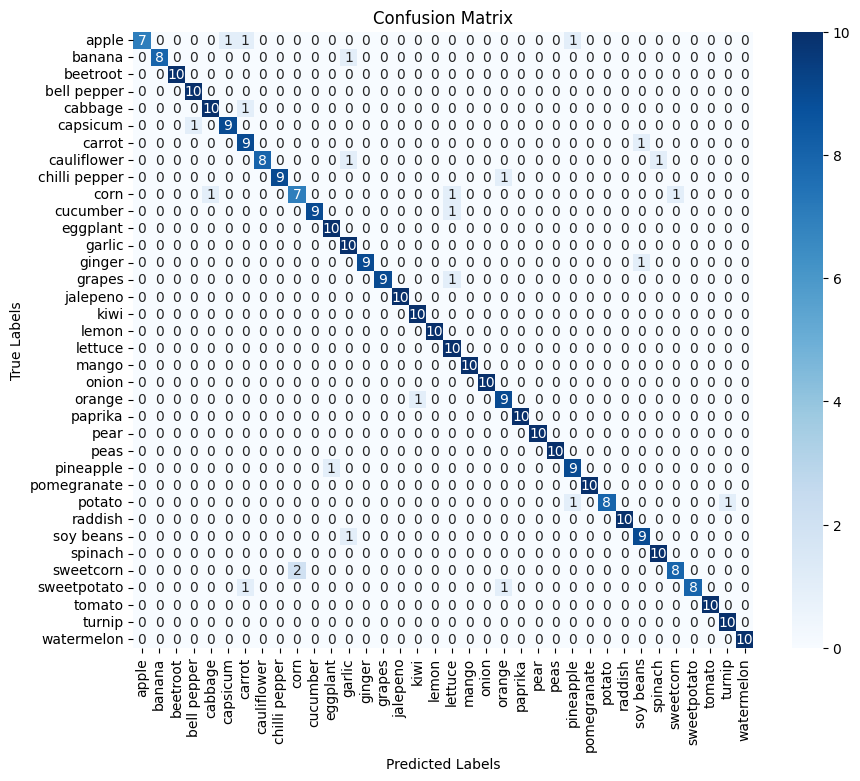

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

for images, labels in test_set:
    true_labels.extend(np.argmax(labels, axis=1))
    predicted_labels.extend(np.argmax(cnn.predict(images), axis=1))

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_set.class_names, yticklabels=test_set.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()